In [2]:
#load modules
import matplotlib.pyplot as plt
import matplotlib
import torch
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import sys
sys.path.append('../')

import PSTHM 
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LongitudeFormatter, LatitudeFormatter
import numpy as np

#set plotting style
%matplotlib inline
font = {'weight':'normal',
       'size':20,
       }
# plt.rcParams["font.family"] = "Helvetica"

matplotlib.rc('font',**font)
matplotlib.rcParams['figure.figsize'] = (12, 6)
import warnings
warnings.filterwarnings("ignore")

### 1. Generate VLM data to compare with Oelsmann et al., 2024 (Figure 2a and S6)

**Source data from:**

Oelsmann, J., Marcos, M., Passaro, M., Sanchez, L., Dettmering, D., Dangendorf, S. and Seitz, F., 2024. Regional variations in relative sea-level changes influenced by nonlinear vertical land motion. Nature Geoscience, 17(2), pp.137-144.

In [4]:
cm_data = [[0.2422, 0.1504, 0.6603],
[0.2444, 0.1534, 0.6728],
[0.2464, 0.1569, 0.6847],
[0.2484, 0.1607, 0.6961],
[0.2503, 0.1648, 0.7071],
[0.2522, 0.1689, 0.7179],
[0.254, 0.1732, 0.7286],
[0.2558, 0.1773, 0.7393],
[0.2576, 0.1814, 0.7501],
[0.2594, 0.1854, 0.761],
[0.2611, 0.1893, 0.7719],
[0.2628, 0.1932, 0.7828],
[0.2645, 0.1972, 0.7937],
[0.2661, 0.2011, 0.8043],
[0.2676, 0.2052, 0.8148],
[0.2691, 0.2094, 0.8249],
[0.2704, 0.2138, 0.8346],
[0.2717, 0.2184, 0.8439],
[0.2729, 0.2231, 0.8528],
[0.274, 0.228, 0.8612],
[0.2749, 0.233, 0.8692],
[0.2758, 0.2382, 0.8767],
[0.2766, 0.2435, 0.884],
[0.2774, 0.2489, 0.8908],
[0.2781, 0.2543, 0.8973],
[0.2788, 0.2598, 0.9035],
[0.2794, 0.2653, 0.9094],
[0.2798, 0.2708, 0.915],
[0.2802, 0.2764, 0.9204],
[0.2806, 0.2819, 0.9255],
[0.2809, 0.2875, 0.9305],
[0.2811, 0.293, 0.9352],
[0.2813, 0.2985, 0.9397],
[0.2814, 0.304, 0.9441],
[0.2814, 0.3095, 0.9483],
[0.2813, 0.315, 0.9524],
[0.2811, 0.3204, 0.9563],
[0.2809, 0.3259, 0.96],
[0.2807, 0.3313, 0.9636],
[0.2803, 0.3367, 0.967],
[0.2798, 0.3421, 0.9702],
[0.2791, 0.3475, 0.9733],
[0.2784, 0.3529, 0.9763],
[0.2776, 0.3583, 0.9791],
[0.2766, 0.3638, 0.9817],
[0.2754, 0.3693, 0.984],
[0.2741, 0.3748, 0.9862],
[0.2726, 0.3804, 0.9881],
[0.271, 0.386, 0.9898],
[0.2691, 0.3916, 0.9912],
[0.267, 0.3973, 0.9924],
[0.2647, 0.403, 0.9935],
[0.2621, 0.4088, 0.9946],
[0.2591, 0.4145, 0.9955],
[0.2556, 0.4203, 0.9965],
[0.2517, 0.4261, 0.9974],
[0.2473, 0.4319, 0.9983],
[0.2424, 0.4378, 0.9991],
[0.2369, 0.4437, 0.9996],
[0.2311, 0.4497, 0.9995],
[0.225, 0.4559, 0.9985],
[0.2189, 0.462, 0.9968],
[0.2128, 0.4682, 0.9948],
[0.2066, 0.4743, 0.9926],
[0.2006, 0.4803, 0.9906],
[0.195, 0.4861, 0.9887],
[0.1903, 0.4919, 0.9867],
[0.1869, 0.4975, 0.9844],
[0.1847, 0.503, 0.9819],
[0.1831, 0.5084, 0.9793],
[0.1818, 0.5138, 0.9766],
[0.1806, 0.5191, 0.9738],
[0.1795, 0.5244, 0.9709],
[0.1785, 0.5296, 0.9677],
[0.1778, 0.5349, 0.9641],
[0.1773, 0.5401, 0.9602],
[0.1768, 0.5452, 0.956],
[0.1764, 0.5504, 0.9516],
[0.1755, 0.5554, 0.9473],
[0.174, 0.5605, 0.9432],
[0.1716, 0.5655, 0.9393],
[0.1686, 0.5705, 0.9357],
[0.1649, 0.5755, 0.9323],
[0.161, 0.5805, 0.9289],
[0.1573, 0.5854, 0.9254],
[0.154, 0.5902, 0.9218],
[0.1513, 0.595, 0.9182],
[0.1492, 0.5997, 0.9147],
[0.1475, 0.6043, 0.9113],
[0.1461, 0.6089, 0.908],
[0.1446, 0.6135, 0.905],
[0.1429, 0.618, 0.9022],
[0.1408, 0.6226, 0.8998],
[0.1383, 0.6272, 0.8975],
[0.1354, 0.6317, 0.8953],
[0.1321, 0.6363, 0.8932],
[0.1288, 0.6408, 0.891],
[0.1253, 0.6453, 0.8887],
[0.1219, 0.6497, 0.8862],
[0.1185, 0.6541, 0.8834],
[0.1152, 0.6584, 0.8804],
[0.1119, 0.6627, 0.877],
[0.1085, 0.6669, 0.8734],
[0.1048, 0.671, 0.8695],
[0.1009, 0.675, 0.8653],
[0.0964, 0.6789, 0.8609],
[0.0914, 0.6828, 0.8562],
[0.0855, 0.6865, 0.8513],
[0.0789, 0.6902, 0.8462],
[0.0713, 0.6938, 0.8409],
[0.0628, 0.6972, 0.8355],
[0.0535, 0.7006, 0.8299],
[0.0433, 0.7039, 0.8242],
[0.0328, 0.7071, 0.8183],
[0.0234, 0.7103, 0.8124],
[0.0155, 0.7133, 0.8064],
[0.0091, 0.7163, 0.8003],
[0.0046, 0.7192, 0.7941],
[0.0019, 0.722, 0.7878],
[0.0009, 0.7248, 0.7815],
[0.0018, 0.7275, 0.7752],
[0.0046, 0.7301, 0.7688],
[0.0094, 0.7327, 0.7623],
[0.0162, 0.7352, 0.7558],
[0.0253, 0.7376, 0.7492],
[0.0369, 0.74, 0.7426],
[0.0504, 0.7423, 0.7359],
[0.0638, 0.7446, 0.7292],
[0.077, 0.7468, 0.7224],
[0.0899, 0.7489, 0.7156],
[0.1023, 0.751, 0.7088],
[0.1141, 0.7531, 0.7019],
[0.1252, 0.7552, 0.695],
[0.1354, 0.7572, 0.6881],
[0.1448, 0.7593, 0.6812],
[0.1532, 0.7614, 0.6741],
[0.1609, 0.7635, 0.6671],
[0.1678, 0.7656, 0.6599],
[0.1741, 0.7678, 0.6527],
[0.1799, 0.7699, 0.6454],
[0.1853, 0.7721, 0.6379],
[0.1905, 0.7743, 0.6303],
[0.1954, 0.7765, 0.6225],
[0.2003, 0.7787, 0.6146],
[0.2061, 0.7808, 0.6065],
[0.2118, 0.7828, 0.5983],
[0.2178, 0.7849, 0.5899],
[0.2244, 0.7869, 0.5813],
[0.2318, 0.7887, 0.5725],
[0.2401, 0.7905, 0.5636],
[0.2491, 0.7922, 0.5546],
[0.2589, 0.7937, 0.5454],
[0.2695, 0.7951, 0.536],
[0.2809, 0.7964, 0.5266],
[0.2929, 0.7975, 0.517],
[0.3052, 0.7985, 0.5074],
[0.3176, 0.7994, 0.4975],
[0.3301, 0.8002, 0.4876],
[0.3424, 0.8009, 0.4774],
[0.3548, 0.8016, 0.4669],
[0.3671, 0.8021, 0.4563],
[0.3795, 0.8026, 0.4454],
[0.3921, 0.8029, 0.4344],
[0.405, 0.8031, 0.4233],
[0.4184, 0.803, 0.4122],
[0.4322, 0.8028, 0.4013],
[0.4463, 0.8024, 0.3904],
[0.4608, 0.8018, 0.3797],
[0.4753, 0.8011, 0.3691],
[0.4899, 0.8002, 0.3586],
[0.5044, 0.7993, 0.348],
[0.5187, 0.7982, 0.3374],
[0.5329, 0.797, 0.3267],
[0.547, 0.7957, 0.3159],
[0.5609, 0.7943, 0.305],
[0.5748, 0.7929, 0.2941],
[0.5886, 0.7913, 0.2833],
[0.6024, 0.7896, 0.2726],
[0.6161, 0.7878, 0.2622],
[0.6297, 0.7859, 0.2521],
[0.6433, 0.7839, 0.2423],
[0.6567, 0.7818, 0.2329],
[0.6701, 0.7796, 0.2239],
[0.6833, 0.7773, 0.2155],
[0.6963, 0.775, 0.2075],
[0.7091, 0.7727, 0.1998],
[0.7218, 0.7703, 0.1924],
[0.7344, 0.7679, 0.1852],
[0.7468, 0.7654, 0.1782],
[0.759, 0.7629, 0.1717],
[0.771, 0.7604, 0.1658],
[0.7829, 0.7579, 0.1608],
[0.7945, 0.7554, 0.157],
[0.806, 0.7529, 0.1546],
[0.8172, 0.7505, 0.1535],
[0.8281, 0.7481, 0.1536],
[0.8389, 0.7457, 0.1546],
[0.8495, 0.7435, 0.1564],
[0.86, 0.7413, 0.1587],
[0.8703, 0.7392, 0.1615],
[0.8804, 0.7372, 0.165],
[0.8903, 0.7353, 0.1695],
[0.9, 0.7336, 0.1749],
[0.9093, 0.7321, 0.1815],
[0.9184, 0.7308, 0.189],
[0.9272, 0.7298, 0.1973],
[0.9357, 0.729, 0.2061],
[0.944, 0.7285, 0.2151],
[0.9523, 0.7284, 0.2237],
[0.9606, 0.7285, 0.2312],
[0.9689, 0.7292, 0.2373],
[0.977, 0.7304, 0.2418],
[0.9842, 0.733, 0.2446],
[0.99, 0.7365, 0.2429],
[0.9946, 0.7407, 0.2394],
[0.9966, 0.7458, 0.2351],
[0.9971, 0.7513, 0.2309],
[0.9972, 0.7569, 0.2267],
[0.9971, 0.7626, 0.2224],
[0.9969, 0.7683, 0.2181],
[0.9966, 0.774, 0.2138],
[0.9962, 0.7798, 0.2095],
[0.9957, 0.7856, 0.2053],
[0.9949, 0.7915, 0.2012],
[0.9938, 0.7974, 0.1974],
[0.9923, 0.8034, 0.1939],
[0.9906, 0.8095, 0.1906],
[0.9885, 0.8156, 0.1875],
[0.9861, 0.8218, 0.1846],
[0.9835, 0.828, 0.1817],
[0.9807, 0.8342, 0.1787],
[0.9778, 0.8404, 0.1757],
[0.9748, 0.8467, 0.1726],
[0.972, 0.8529, 0.1695],
[0.9694, 0.8591, 0.1665],
[0.9671, 0.8654, 0.1636],
[0.9651, 0.8716, 0.1608],
[0.9634, 0.8778, 0.1582],
[0.9619, 0.884, 0.1557],
[0.9608, 0.8902, 0.1532],
[0.9601, 0.8963, 0.1507],
[0.9596, 0.9023, 0.148],
[0.9595, 0.9084, 0.145],
[0.9597, 0.9143, 0.1418],
[0.9601, 0.9203, 0.1382],
[0.9608, 0.9262, 0.1344],
[0.9618, 0.932, 0.1304],
[0.9629, 0.9379, 0.1261],
[0.9642, 0.9437, 0.1216],
[0.9657, 0.9494, 0.1168],
[0.9674, 0.9552, 0.1116],
[0.9692, 0.9609, 0.1061],
[0.9711, 0.9667, 0.1001],
[0.973, 0.9724, 0.0938],
[0.9749, 0.9782, 0.0872],
[0.9769, 0.9839, 0.0805]]
from matplotlib.colors import LinearSegmentedColormap

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
parula=parula_map


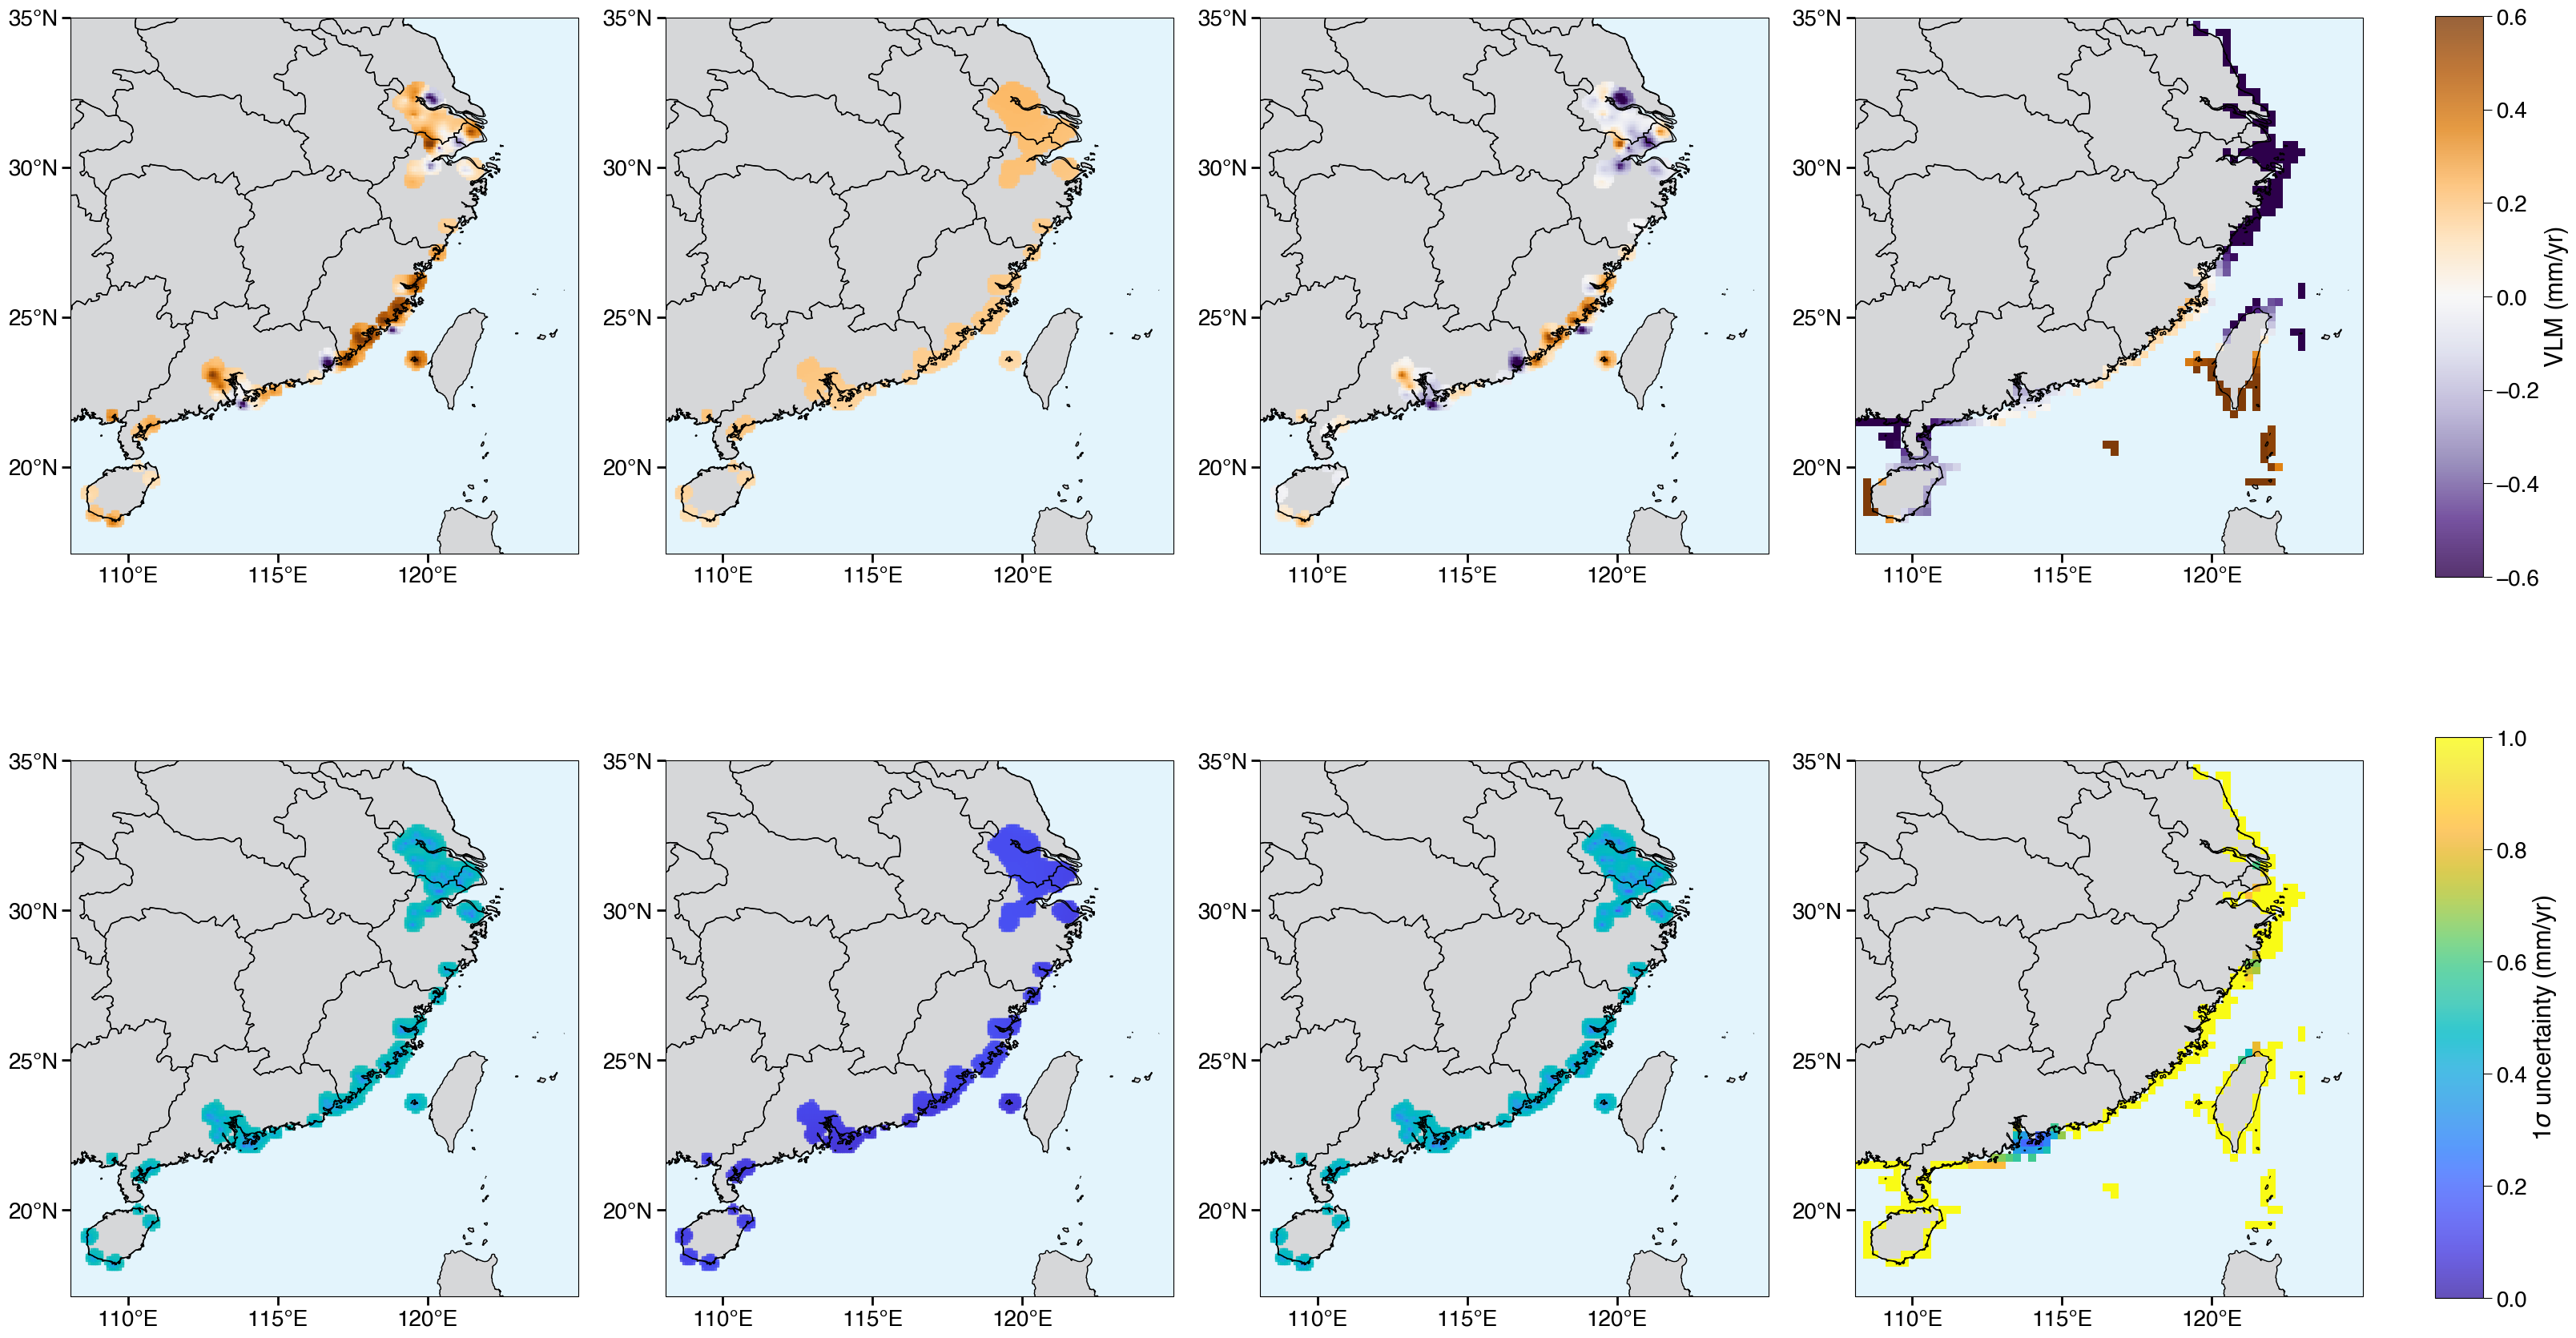

In [5]:

# Load the dataset
ds = xr.open_dataset("../data/vlm_map_data.nc")

# Extract data for plotting
finer_lon = ds.lon.values
finer_lat = ds.lat.values
os_vlm_lon = ds.os_lon.values
os_vlm_lat = ds.os_lat.values
combined_vlm = ds.combined_vlm.values
interpolated_vlm = ds.interpolated_vlm.values
masked_test_regional = ds.masked_test_regional.values
os_vlm_trend = ds.os_vlm_trend.values
combined_std = ds.combined_std.values
interpolated_vlm_std = ds.interpolated_vlm_std.values
masked_regional_std = ds.masked_regional_std.values
os_vlm_trend_uncertainty = ds.os_vlm_trend_uncertainty.values

# Region bounds
min_rsl_lon = ds.min_rsl_lon.values
max_rsl_lon = ds.max_rsl_lon.values
min_rsl_lat = ds.min_rsl_lat.values
max_rsl_lat = ds.max_rsl_lat.values

# Create the figure
fig = plt.figure(figsize=(30, 20))

# Subplot 241: Combined VLM
ax241 = fig.add_subplot(241, projection=ccrs.PlateCarree())
ax241.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', zorder=0, facecolor='#d6d7d9', linewidth=0.5)
ax241.add_feature(cfeature.STATES, edgecolor='black', zorder=1, facecolor='None', linewidth=1)
ax241.coastlines(resolution='10m', linewidth=1)
ax241.set_extent([min_rsl_lon-0.6, max_rsl_lon+3.5, min_rsl_lat-1.1, max_rsl_lat+1.1])
ax241.set_xticks([110, 115, 120], crs=ccrs.PlateCarree())
ax241.set_yticks(np.arange(20, 40, 5), crs=ccrs.PlateCarree())
ax241.xaxis.set_tick_params(width=2)
ax241.yaxis.set_tick_params(width=2)
ax241.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax241.yaxis.set_major_formatter(LatitudeFormatter())
ax241.add_feature(cfeature.OCEAN, facecolor='#e3f4fc', zorder=0)
sc241 = ax241.scatter(finer_lon, finer_lat, c=combined_vlm, facecolor='none', s=20, alpha=0.8, 
                     cmap='PuOr_r', vmax=0.6, vmin=-0.6, marker='s')

# Subplot 242: Interpolated VLM
ax242 = fig.add_subplot(242, projection=ccrs.PlateCarree())
ax242.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', zorder=0, facecolor='#d6d7d9', linewidth=0.5)
ax242.add_feature(cfeature.STATES, edgecolor='black', zorder=1, facecolor='None', linewidth=1)
ax242.coastlines(resolution='10m', linewidth=1)
ax242.set_extent([min_rsl_lon-0.6, max_rsl_lon+3.5, min_rsl_lat-1.1, max_rsl_lat+1.1])
ax242.set_xticks([110, 115, 120], crs=ccrs.PlateCarree())
ax242.set_yticks(np.arange(20, 40, 5), crs=ccrs.PlateCarree())
ax242.xaxis.set_tick_params(width=2)
ax242.yaxis.set_tick_params(width=2)
ax242.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax242.yaxis.set_major_formatter(LatitudeFormatter())
ax242.add_feature(cfeature.OCEAN, facecolor='#e3f4fc', zorder=0)
sc242 = ax242.scatter(finer_lon, finer_lat, c=interpolated_vlm, facecolor='none', s=20, alpha=0.8, 
                     cmap='PuOr_r', vmax=0.6, vmin=-0.6, marker='s')

# Subplot 243: Masked Test Regional
ax243 = fig.add_subplot(243, projection=ccrs.PlateCarree())
ax243.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', zorder=0, facecolor='#d6d7d9', linewidth=0.5)
ax243.add_feature(cfeature.STATES, edgecolor='black', zorder=1, facecolor='None', linewidth=1)
ax243.coastlines(resolution='10m', linewidth=1)
ax243.set_extent([min_rsl_lon-0.6, max_rsl_lon+3.5, min_rsl_lat-1.1, max_rsl_lat+1.1])
ax243.set_xticks([110, 115, 120], crs=ccrs.PlateCarree())
ax243.set_yticks(np.arange(20, 40, 5), crs=ccrs.PlateCarree())
ax243.xaxis.set_tick_params(width=2)
ax243.yaxis.set_tick_params(width=2)
ax243.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax243.yaxis.set_major_formatter(LatitudeFormatter())
ax243.add_feature(cfeature.OCEAN, facecolor='#e3f4fc', zorder=0)
sc243 = ax243.scatter(finer_lon, finer_lat, c=masked_test_regional, facecolor='none', s=20, alpha=0.8, 
                     cmap='PuOr_r', vmax=0.6, vmin=-0.6, marker='s')

# Subplot 244: OS VLM Trend
ax244 = fig.add_subplot(244, projection=ccrs.PlateCarree())
ax244.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', zorder=0, facecolor='#d6d7d9', linewidth=0.5)
ax244.add_feature(cfeature.STATES, edgecolor='black', zorder=1, facecolor='None', linewidth=1)
ax244.coastlines(resolution='10m', linewidth=1)
ax244.set_extent([min_rsl_lon-0.6, max_rsl_lon+3.5, min_rsl_lat-1.1, max_rsl_lat+1.1])
ax244.set_xticks([110, 115, 120], crs=ccrs.PlateCarree())
ax244.set_yticks(np.arange(20, 40, 5), crs=ccrs.PlateCarree())
ax244.xaxis.set_tick_params(width=2)
ax244.yaxis.set_tick_params(width=2)
ax244.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax244.yaxis.set_major_formatter(LatitudeFormatter())
ax244.add_feature(cfeature.OCEAN, facecolor='#e3f4fc', zorder=0)
sc244 = ax244.scatter(os_vlm_lon, os_vlm_lat, c=os_vlm_trend, marker='s', facecolor='none', 
                     ec='none', s=50, cmap='PuOr_r', vmax=0.6, vmin=-0.6)

# Subplot 245: Combined Std
ax245 = fig.add_subplot(245, projection=ccrs.PlateCarree())
ax245.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', zorder=0, facecolor='#d6d7d9', linewidth=0.5)
ax245.add_feature(cfeature.STATES, edgecolor='black', zorder=1, facecolor='None', linewidth=1)
ax245.coastlines(resolution='10m', linewidth=1)
ax245.set_extent([min_rsl_lon-0.6, max_rsl_lon+3.5, min_rsl_lat-1.1, max_rsl_lat+1.1])
ax245.set_xticks([110, 115, 120], crs=ccrs.PlateCarree())
ax245.set_yticks(np.arange(20, 40, 5), crs=ccrs.PlateCarree())
ax245.xaxis.set_tick_params(width=2)
ax245.yaxis.set_tick_params(width=2)
ax245.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax245.yaxis.set_major_formatter(LatitudeFormatter())
ax245.add_feature(cfeature.OCEAN, facecolor='#e3f4fc', zorder=0)
sc245 = ax245.scatter(finer_lon, finer_lat, c=combined_std, facecolor='none', s=20, alpha=0.8, 
                     vmax=1, vmin=0, marker='s', cmap=parula)

# Subplot 246: Interpolated VLM Std
ax246 = fig.add_subplot(246, projection=ccrs.PlateCarree())
ax246.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', zorder=0, facecolor='#d6d7d9', linewidth=0.5)
ax246.add_feature(cfeature.STATES, edgecolor='black', zorder=1, facecolor='None', linewidth=1)
ax246.coastlines(resolution='10m', linewidth=1)
ax246.set_extent([min_rsl_lon-0.6, max_rsl_lon+3.5, min_rsl_lat-1.1, max_rsl_lat+1.1])
ax246.set_xticks([110, 115, 120], crs=ccrs.PlateCarree())
ax246.set_yticks(np.arange(20, 40, 5), crs=ccrs.PlateCarree())
ax246.xaxis.set_tick_params(width=2)
ax246.yaxis.set_tick_params(width=2)
ax246.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax246.yaxis.set_major_formatter(LatitudeFormatter())
ax246.add_feature(cfeature.OCEAN, facecolor='#e3f4fc', zorder=0)
sc246 = ax246.scatter(finer_lon, finer_lat, c=interpolated_vlm_std, facecolor='none', s=20, alpha=0.8, 
                     vmax=1, vmin=0, marker='s', cmap=parula)

# Subplot 247: Masked Regional Std
ax247 = fig.add_subplot(247, projection=ccrs.PlateCarree())
ax247.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', zorder=0, facecolor='#d6d7d9', linewidth=0.5)
ax247.add_feature(cfeature.STATES, edgecolor='black', zorder=1, facecolor='None', linewidth=1)
ax247.coastlines(resolution='10m', linewidth=1)
ax247.set_extent([min_rsl_lon-0.6, max_rsl_lon+3.5, min_rsl_lat-1.1, max_rsl_lat+1.1])
ax247.set_xticks([110, 115, 120], crs=ccrs.PlateCarree())
ax247.set_yticks(np.arange(20, 40, 5), crs=ccrs.PlateCarree())
ax247.xaxis.set_tick_params(width=2)
ax247.yaxis.set_tick_params(width=2)
ax247.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax247.yaxis.set_major_formatter(LatitudeFormatter())
ax247.add_feature(cfeature.OCEAN, facecolor='#e3f4fc', zorder=0)
sc247 = ax247.scatter(finer_lon, finer_lat, c=masked_regional_std, facecolor='none', s=20, alpha=0.8, 
                     vmax=1, vmin=0, marker='s', cmap=parula)

# Subplot 248: OS VLM Trend Uncertainty
ax248 = fig.add_subplot(248, projection=ccrs.PlateCarree())
ax248.add_feature(cfeature.LAND.with_scale('10m'), edgecolor='black', zorder=0, facecolor='#d6d7d9', linewidth=0.5)
ax248.add_feature(cfeature.STATES, edgecolor='black', zorder=1, facecolor='None', linewidth=1)
ax248.coastlines(resolution='10m', linewidth=1)
ax248.set_extent([min_rsl_lon-0.6, max_rsl_lon+3.5, min_rsl_lat-1.1, max_rsl_lat+1.1])
ax248.set_xticks([110, 115, 120], crs=ccrs.PlateCarree())
ax248.set_yticks(np.arange(20, 40, 5), crs=ccrs.PlateCarree())
ax248.xaxis.set_tick_params(width=2)
ax248.yaxis.set_tick_params(width=2)
ax248.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
ax248.yaxis.set_major_formatter(LatitudeFormatter())
ax248.add_feature(cfeature.OCEAN, facecolor='#e3f4fc', zorder=0)
sc248 = ax248.scatter(os_vlm_lon, os_vlm_lat, c=os_vlm_trend_uncertainty, marker='s', facecolor='none', 
                     ec='none', s=50, cmap=parula, vmax=1, vmin=0)

# Add shared colorbar for top row (241-244, PuOr_r colormap)
cbar_ax_top = fig.add_axes([1.02, 0.55, 0.02, 0.35])  # [left, bottom, width, height]
cbar_top = fig.colorbar(sc241, cax=cbar_ax_top)  # Use sc241 as representative (all use same range)
cbar_top.set_label('VLM (mm/yr)', fontsize=22)
cbar_top.set_ticks(np.linspace(-0.6, 0.6, 7))

# Add shared colorbar for bottom row (245-248, parula colormap)
cbar_ax_bottom = fig.add_axes([1.02, 0.10, 0.02, 0.35])  # [left, bottom, width, height]
cbar_bottom = fig.colorbar(sc245, cax=cbar_ax_bottom)  # Use sc245 as representative
cbar_bottom.set_label('1$\sigma$ uncertainty (mm/yr)', fontsize=22)
cbar_bottom.set_ticks(np.linspace(0, 1, 6))

plt.tight_layout()
plt.show()

### 2. Intercomparison with GNSS data (Figure S7)

GNSS data is obtained from Nevada Geodetic Laboratory at the University of Nevada (http://geodesy.unr.edu).

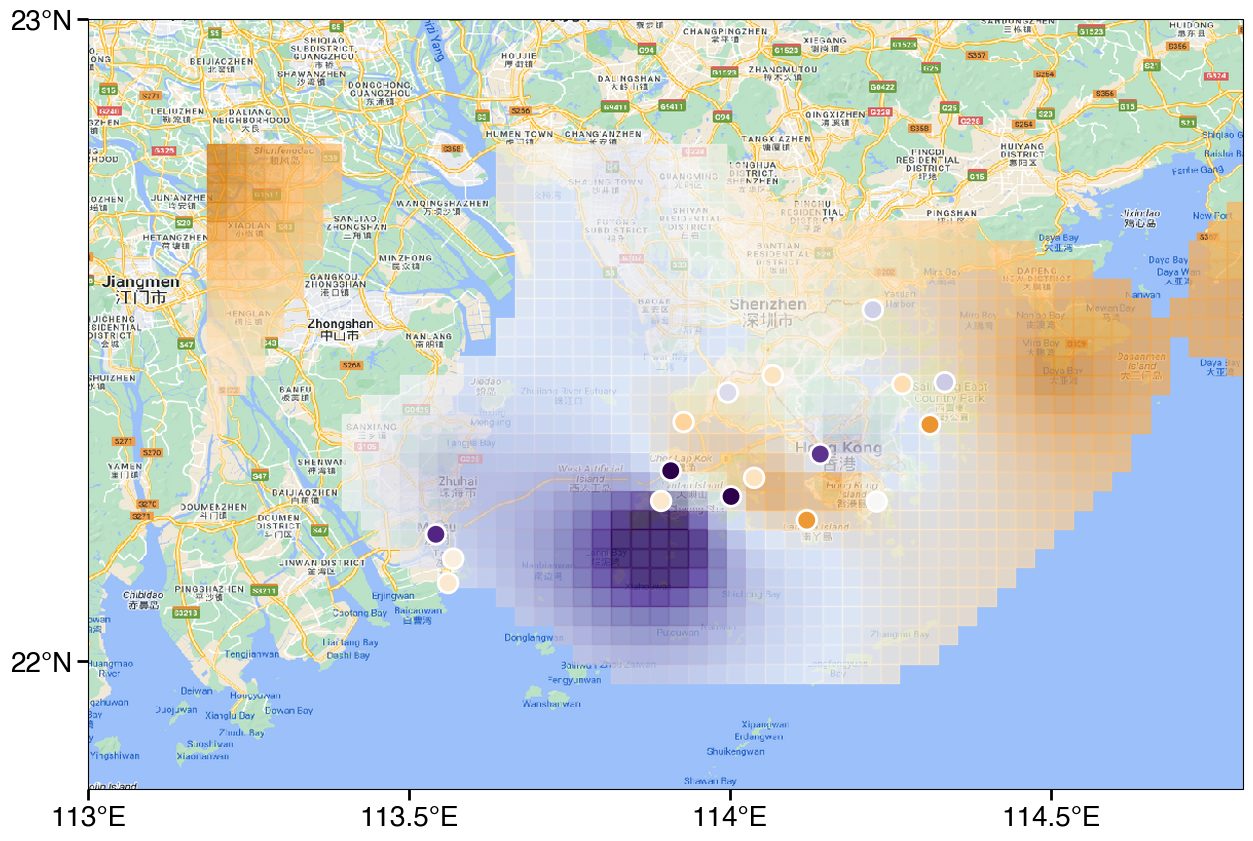

In [6]:

from cartopy.io.img_tiles import GoogleTiles


# Load the dataset
ds = xr.open_dataset("../data/vlm_PRD_map_data.nc")

# Extract data for plotting
pred_lon = ds.lon.values
pred_lat = ds.lat.values
combined_vlm = ds.combined_vlm.values
gps_lon = ds.gps_lon.values
gps_lat = ds.gps_lat.values
gps_vlm = ds.gps_vlm.values
min_lon = ds.min_lon.values
max_lon = ds.max_lon.values
min_lat = ds.min_lat.values
max_lat = ds.max_lat.values

# Create the figure
fig = plt.figure(figsize=(18, 10))
ax2 = fig.add_subplot(111, projection=ccrs.PlateCarree())

# Add Google Tiles basemap
osm = GoogleTiles()
ax2.add_image(osm, 10, interpolation='spline36')

# Set extent and features
ax2.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.OCEAN, facecolor='#e3f4fc', zorder=0)

# Scatter plots
test_map = ax2.scatter(pred_lon, pred_lat, c=combined_vlm, facecolor='none', s=180, alpha=0.7, 
                      cmap='PuOr_r', vmax=0.6, vmin=-0.6, marker='s')
plt.scatter(gps_lon, gps_lat, c=gps_vlm, marker='o', cmap='PuOr_r', vmax=0.6, vmin=-0.6, 
            edgecolor='w', s=200, linewidth=2, zorder=11)

# Set ticks and formatters
ax2.set_xticks([113, 113.5, 114, 114.5], crs=ccrs.PlateCarree())
ax2.set_yticks([22, 23], crs=ccrs.PlateCarree())
ax2.set_ylim(21.8, 23)
ax2.set_xlim(113, 114.8)
ax2.xaxis.set_tick_params(width=2)
ax2.yaxis.set_tick_params(width=2)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)

# Grid (set to None as in original)
ax2.grid(color='None')

# Uncomment to add colorbar if desired
# plt.colorbar(test_map, label='VLM rate (mm/yr)')

# Save the figure
plt.show()

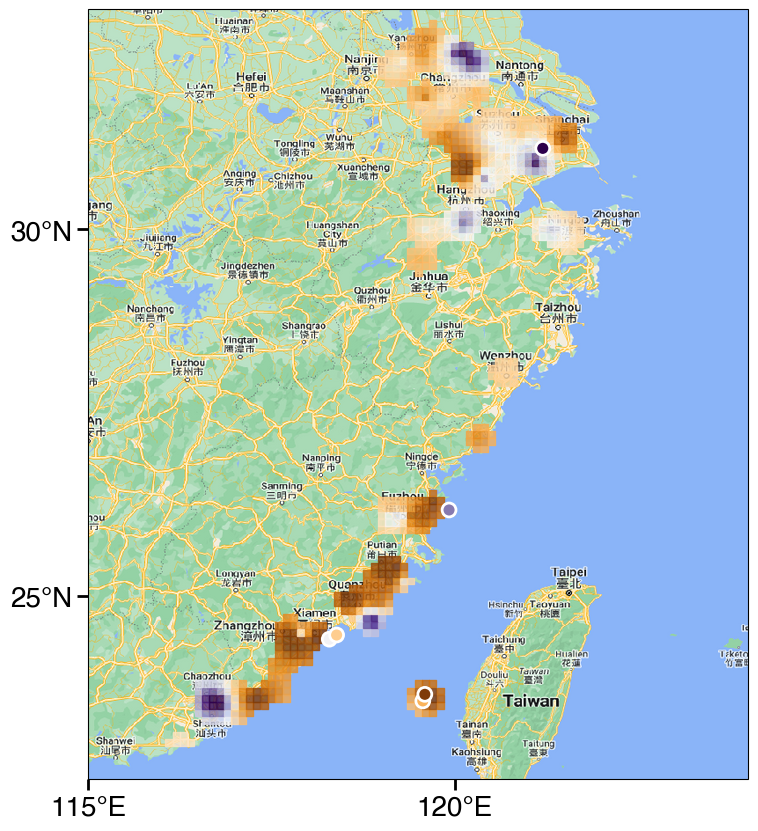

In [7]:

# Load the dataset
ds = xr.open_dataset("../data/vlm_eastern_map_data.nc")

# Extract data for plotting
pred_lon = ds.lon.values
pred_lat = ds.lat.values
combined_vlm = ds.combined_vlm.values
gps_lon = ds.gps_lon.values
gps_lat = ds.gps_lat.values
gps_vlm = ds.gps_vlm.values
min_lon = ds.min_lon.values
max_lon = ds.max_lon.values
min_lat = ds.min_lat.values
max_lat = ds.max_lat.values

# Create the figure
fig = plt.figure(figsize=(20, 10))
ax2 = fig.add_subplot(111, projection=ccrs.PlateCarree())

# Add Google Tiles basemap
osm = GoogleTiles()
ax2.add_image(osm, 7, interpolation='spline36')

# Set extent and features
ax2.set_extent([min_lon, max_lon, min_lat, max_lat], crs=ccrs.PlateCarree())
ax2.add_feature(cfeature.OCEAN, facecolor='#e3f4fc', zorder=0)

# Scatter plots
test_map = ax2.scatter(pred_lon, pred_lat, c=combined_vlm, facecolor='none', s=25, alpha=0.8, 
                      cmap='PuOr_r', vmax=0.6, vmin=-0.6, marker='s')
plt.scatter(gps_lon, gps_lat, c=gps_vlm, marker='o', cmap='PuOr_r', vmax=0.6, vmin=-0.6, 
            edgecolor='w', s=100, linewidth=2, zorder=11)

# Set ticks and formatters
ax2.set_xticks([115, 120], crs=ccrs.PlateCarree())
ax2.set_yticks(np.arange(25, 33, 5), crs=ccrs.PlateCarree())
ax2.xaxis.set_tick_params(width=2)
ax2.yaxis.set_tick_params(width=2)
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax2.xaxis.set_major_formatter(lon_formatter)
ax2.yaxis.set_major_formatter(lat_formatter)

# Grid
ax2.grid(color='None')

# Uncomment to add colorbar if desired
# plt.colorbar(test_map, label='Vertical Land Motion (mm/yr)')

# Save the figure
plt.show()

### 3. Geology vs GNSS plots (Figure 4c and d)

In [26]:
import xarray as xr
import numpy as np

# Load the dataset
ds = xr.open_dataset("../Data/gia_VLM_rate.nc")

# Extract data to recreate original variables
gia_vlm_rate_mean = ds.gia_vlm_rate_mean.values  # 2D array (81, 77)
gia_vlm_std = ds.gia_vlm_std.values  # 2D array (81, 77)
gia_vlm_lat = ds.lat.values  # 1D array (81)
gia_vlm_lon = ds.lon.values  # 1D array (77)

# Recreate lon_grid, lat_grid, and points
lon_grid, lat_grid = np.meshgrid(gia_vlm_lon, gia_vlm_lat)
points = np.column_stack((lat_grid.ravel(), lon_grid.ravel()))
values = gia_vlm_rate_mean.ravel()


china_gps = pd.read_excel('../Data/China_GNSS.xlsx')
gps_lon = china_gps['Longitude'].values
gps_lat = china_gps['Latitude'].values
gps_vlm = china_gps['VLM Rate (mm/yr)'].values
gps_vlm_sd = china_gps['VLM stand error'].values
gps_vlm_length = china_gps['Totoal Year'].values
gpr = torch.load('../GP_model/china_gpr_v4.pt')

from scipy.interpolate import griddata
pred_matrix = np.zeros([gps_lon.shape[0],3])
pred_matrix[:,0] = 1000
pred_matrix[:,1] = gps_lat
pred_matrix[:,2] = gps_lon
pred_matrix = torch.tensor(pred_matrix).double()
regional_linear_kernel = gpr.kernel.kern0.kern0.kern0.kern0.kern0.kern0.kern0.kern0.kern0
regional_l_dep = PSTHM.post.decompose_kernels(gpr, pred_matrix, [regional_linear_kernel])
regional_l_mean,regional_l_var = regional_l_dep[0]
regional_l_std = regional_l_var.diag().sqrt()

#interpolate GIA model to GPS stations
interpolated_vlm_values = griddata(points, values, pred_matrix[:,1:].detach().numpy(), method='cubic')



In [27]:
import numpy as np
import scipy.stats as stats
def weighted_pearsonr_with_pval(x, y, x_err, y_err):
    """
    Compute weighted Pearson correlation coefficient and its significance (p-value).
    
    Parameters:
    x (array-like): First variable
    y (array-like): Second variable
    x_err (array-like): Uncertainties in the first variable
    y_err (array-like): Uncertainties in the second variable
    
    Returns:
    tuple: (Weighted Pearson correlation coefficient, p-value)
    """
    # Compute weights
    weights = 1 / np.sqrt(x_err**2 + y_err**2)

    # Weighted mean
    mean_x = np.average(x, weights=weights)
    mean_y = np.average(y, weights=weights)

    # Weighted covariance and variances
    cov_xy = np.sum(weights * (x - mean_x) * (y - mean_y)) / np.sum(weights)
    var_x = np.sum(weights * (x - mean_x)**2) / np.sum(weights)
    var_y = np.sum(weights * (y - mean_y)**2) / np.sum(weights)

    # Weighted Pearson correlation
    weighted_corr = cov_xy / np.sqrt(var_x * var_y)

    # Effective sample size (n_eff)
    n_eff = (np.sum(weights) ** 2) / np.sum(weights ** 2)

    # Compute t-statistic
    t_stat = weighted_corr * np.sqrt((n_eff - 2) / (1 - weighted_corr ** 2))

    # Compute p-value using t-distribution
    p_value = 2 * (1 - stats.t.cdf(abs(t_stat), df=n_eff - 2))

    return weighted_corr, p_value

test_index = regional_l_std<0.487
test_index = (gps_vlm>=0.1)
test_index_2 = (gps_vlm<-0.1)


# Compute correlation and significance for uplift
r_uplift, p_uplift = weighted_pearsonr_with_pval(
    gps_vlm[test_index], 
    regional_l_mean[test_index].detach().numpy() + interpolated_vlm_values[test_index], 
    x_err=gps_vlm_sd[test_index], 
    y_err=regional_l_std[test_index].detach().numpy()
)
print(f"Weighted Pearson Correlation (Uplift): {r_uplift:.4f}, p-value: {p_uplift:.4f}")
print(f"R² Uplift: {r_uplift**2:.4f}")
print(f"RMS Uplift: {np.sqrt(np.mean((gps_vlm[test_index] - (regional_l_mean[test_index].detach().numpy() + interpolated_vlm_values[test_index]))**2)):.4f}")
print(f"Normalized RMS Uplift: {np.sqrt(np.mean((gps_vlm[test_index] - (regional_l_mean[test_index].detach().numpy() + interpolated_vlm_values[test_index]))**2/(gps_vlm_sd[test_index]+regional_l_std[test_index].detach().numpy()))**2):.4f}")

# Compute correlation and significance for subsidence
r_subsidence, p_subsidence = weighted_pearsonr_with_pval(
    gps_vlm[test_index_2], 
    regional_l_mean[test_index_2].detach().numpy() + interpolated_vlm_values[test_index_2], 
    x_err=gps_vlm_sd[test_index_2], 
    y_err=regional_l_std[test_index_2].detach().numpy()
)
print('------------------------------------')
print(f"Weighted Pearson Correlation (Subsidence): {r_subsidence:.4f}, p-value: {p_subsidence:.4f}")
print(f"R² Subsidence: {r_subsidence**2:.4f}")
print(f"RMS Subsidence: {np.sqrt(np.mean((gps_vlm[test_index_2] - (regional_l_mean[test_index_2].detach().numpy() + interpolated_vlm_values[test_index_2]))**2)):.4f}")
print(f"Normalized RMS Subsidence: {np.sqrt(np.mean((gps_vlm[test_index_2] - (regional_l_mean[test_index_2].detach().numpy() + interpolated_vlm_values[test_index_2]))**2/(gps_vlm_sd[test_index_2]+regional_l_std[test_index_2].detach().numpy()))**2):.4f}")


Weighted Pearson Correlation (Uplift): 0.8152, p-value: 0.0089
R² Uplift: 0.6646
RMS Uplift: 0.1929
Normalized RMS Uplift: 0.0403
------------------------------------
Weighted Pearson Correlation (Subsidence): 0.2484, p-value: 0.5247
R² Subsidence: 0.0617
RMS Subsidence: 0.9423
Normalized RMS Subsidence: 0.9187


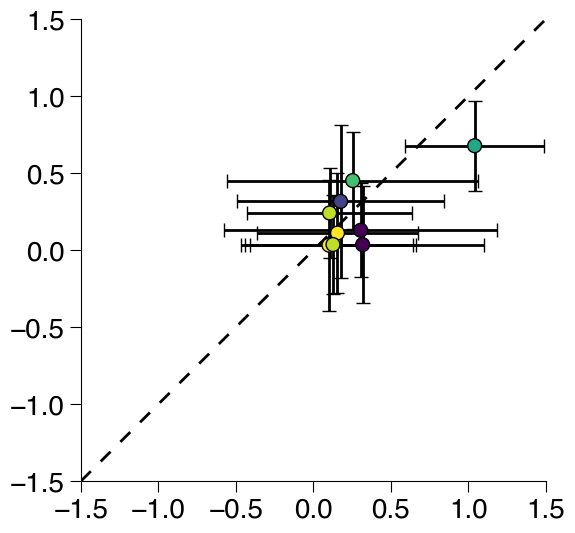

In [28]:
plt.figure(figsize=(6,6))
regional_l_mean = regional_l_mean.detach().numpy()
regional_l_std = regional_l_std.detach().numpy()
plt.errorbar(gps_vlm[test_index],regional_l_mean[test_index]+interpolated_vlm_values[test_index],xerr= gps_vlm_sd[test_index],yerr=regional_l_std[test_index],fmt=' ',ecolor='k',elinewidth=2,capsize=5)
plt.scatter(gps_vlm[test_index],regional_l_mean[test_index]+interpolated_vlm_values[test_index],c=gps_vlm_length[test_index],cmap='viridis',vmax=20,vmin=10,zorder=10,edgecolor='k',s=100)
# plt.colorbar(label='GPS Length (Years)')
plt.plot([-1.5,1.5],[-1.5,1.5],'k--',dashes=(5, 5),linewidth=2)
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
ax = plt.gca()  # Get the current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Manually set the same ticks and labels for both axes
plt.xticks(ticks=[-1.5,-1,-0.5,0,0.5,1,1.5])  # Set the x-axis ticks
plt.yticks(ticks=[-1.5,-1,-0.5,0,0.5,1,1.5]);  # Set the y-axis ticks to match
# plt.savefig('Figures/VLM_comparison_GPS_uplift.pdf',dpi=300);

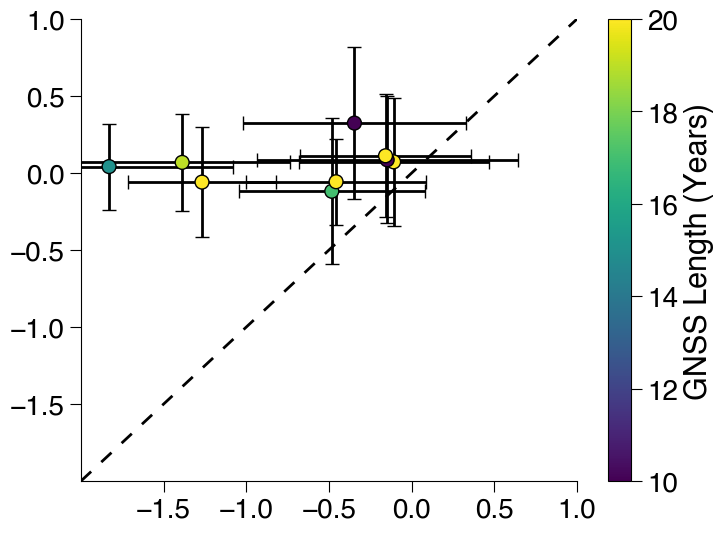

In [29]:
plt.figure(figsize=(8,6))
# regional_l_mean = regional_l_mean.detach().numpy()
# regional_l_std = regional_l_std.detach().numpy()
plt.errorbar(gps_vlm[test_index_2],regional_l_mean[test_index_2]+interpolated_vlm_values[test_index_2],xerr= gps_vlm_sd[test_index_2],yerr=regional_l_std[test_index_2],fmt=' ',ecolor='k',elinewidth=2,capsize=5)
plt.scatter(gps_vlm[test_index_2],regional_l_mean[test_index_2]+interpolated_vlm_values[test_index_2],c=gps_vlm_length[test_index_2],cmap='viridis',vmax=20,vmin=10,zorder=10,edgecolor='k',s=100)
plt.colorbar(label='GNSS Length (Years)')
plt.plot([-2,2],[-2,2],'k--',dashes=(5, 5),linewidth=2)
plt.xlim([-2,1])
plt.ylim([-2,1])
ax = plt.gca()  # Get the current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Manually set the same ticks and labels for both axes
ax = plt.gca()  # Get the current axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# Manually set the same ticks and labels for both axes
plt.xticks(ticks=[-1.5,-1,-0.5,0,0.5,1])  # Set the x-axis ticks
plt.yticks(ticks=[-1.5,-1,-0.5,0,0.5,1]);  # Set the y-axis ticks to match
# plt.savefig('Figures/VLM_comparison_GPS_subsidence.pdf',dpi=300);

### Geological VLM vs InSAR data (Table 1)

In [ ]:
insar_df = pd.read_excel('../Data/INSAR_data.xlsx')
insar_coastal = np.array(insar_df['Coastal'].values,dtype=bool)
insar_coastal = (insar_coastal& (insar_df['Lat'].values<32))
insar_coastal[19] = True
insar_coastal[57] = True
insar_coastal[51] = True
insar_coastal[67] = True
insar_coastal[6] = True


insar_lon = insar_df['Lon'].values[insar_coastal]
insar_lat = insar_df['Lat'].values[insar_coastal]
insar_vlm_median = insar_df['Median'].values[insar_coastal]
insar_vlm_5 = insar_df['5th'].values[insar_coastal]
insar_vlm_95 = insar_df['95th'].values[insar_coastal]
insar_name = insar_df['Name'].values[insar_coastal]
gia_vlm = np.zeros([len(insar_lon),3])
geological_vlm =np.zeros([len(insar_lon),3])
geological_vlm_index = np.zeros([len(insar_lon)],dtype=bool)
#for each insar city location, calculate the geological VLM and GIA VLM
for i in range(len(insar_lon)):
    testing_lon = insar_lon[i]
    testing_lat = insar_lat[i]
    pred_matrix = PSTHM.post.gen_pred_matrix(1000,np.arange(testing_lat-0.25,testing_lat+0.25,0.01),np.arange(testing_lon-0.25,testing_lon+0.25,0.01))
    regional_l_dep = PSTHM.post.decompose_kernels(gpr, pred_matrix, [regional_linear_kernel])
    regional_l_mean,regional_l_var = regional_l_dep[0]
    regional_l_std = regional_l_var.diag().sqrt()
    test_max,test_min =np.max(regional_l_mean.detach().numpy()+1.64*regional_l_std.detach().numpy()),np.min(regional_l_mean.detach().numpy() -1.64*regional_l_std.detach().numpy())
    interpolated_gia_value = griddata(points, values, pred_matrix[:,1:].detach().numpy(), method='cubic')
    interpolated_gia_std = griddata(points, gia_vlm_std.ravel(), pred_matrix[:,1:].detach().numpy(), method='cubic')
    gia_max = np.nanmax(interpolated_gia_value) + 1.64*interpolated_gia_std[np.nanargmax(interpolated_gia_value)]
    gia_min = np.nanmin(interpolated_gia_value) - 1.64*interpolated_gia_std[np.nanargmin(interpolated_gia_value)]
    geological_vlm[i,0] = np.mean(regional_l_mean.detach().numpy())
    geological_vlm[i,1] = test_max
    geological_vlm[i,2] = test_min
    gia_vlm[i,0] = np.mean(interpolated_gia_value)
    gia_vlm[i,1] = gia_max
    gia_vlm[i,2] = gia_min
    if regional_l_std.min()<0.45:
        #regional_l_std <0.45 means there should be a geologial data nearby the selected city
        geological_vlm_index[i] = True
    else:
        geological_vlm_index[i] = False

geological_vlm = geological_vlm[geological_vlm_index]
insar_vlm_median = insar_vlm_median[geological_vlm_index]
insar_vlm_5 = insar_vlm_5[geological_vlm_index]
insar_vlm_95 = insar_vlm_95[geological_vlm_index]
insar_lon = insar_lon[geological_vlm_index]
insar_lat = insar_lat[geological_vlm_index]
insar_name = insar_name[geological_vlm_index]
gia_vlm = gia_vlm[geological_vlm_index]


In [17]:
order_index = np.argsort(insar_lat)[::-1]
insar_vlm_median = insar_vlm_median[order_index]
geological_vlm = geological_vlm[order_index]
geological_vlm_std = (geological_vlm[:,1]-geological_vlm[:,2])/4
insar_vlm_5 = insar_vlm_5[order_index]
insar_vlm_95 = insar_vlm_95[order_index]
insar_vlm_std = (insar_vlm_95-insar_vlm_5)[order_index]/4
insar_lon = insar_lon[order_index]
insar_lat = insar_lat[order_index]
insar_name = insar_name[order_index]

# Calculate the values for each column
natural_vlm = geological_vlm[:, 0] + gia_vlm[:, 0]
natural_vlm_lower = geological_vlm[:, 2] + gia_vlm[:, 2]
natural_vlm_upper = geological_vlm[:, 1] + gia_vlm[:, 1]

insar_vlm = insar_vlm_median
insar_vlm_lower = insar_vlm_5
insar_vlm_upper = insar_vlm_95

anthro_vlm = insar_vlm_median - (geological_vlm[:, 0] + gia_vlm[:, 0])
anthro_vlm_lower = insar_vlm_5 - (geological_vlm[:, 2] + gia_vlm[:, 2])
anthro_vlm_upper = insar_vlm_95 - (geological_vlm[:, 1] + gia_vlm[:, 1])

ratio = 100 * anthro_vlm / insar_vlm_median

# Create formatted strings for each column with bounds
natural_vlm_str = [f"{val:4.1f} ({lower:4.1f}, {upper:4.1f})" 
                  for val, lower, upper in zip(natural_vlm, natural_vlm_lower, natural_vlm_upper)]

insar_vlm_str = [f"{val:4.1f} ({lower:4.1f}, {upper:4.1f})" 
                 for val, lower, upper in zip(insar_vlm, insar_vlm_lower, insar_vlm_upper)]

anthro_vlm_str = [f"{val:4.1f} ({lower:4.1f}, {upper:4.1f})" 
                  for val, lower, upper in zip(anthro_vlm, anthro_vlm_lower, anthro_vlm_upper)]

ratio_str = [f"{val:4.0f}%" for val in ratio]

# Create a pandas DataFrame
df = pd.DataFrame({
    'City Name': insar_name,
    'Geological VLM (mm/yr)': natural_vlm_str,
    'InSAR VLM (mm/yr)': insar_vlm_str,
    'Anthropogenic VLM (mm/yr)': anthro_vlm_str,
    'Ratio (%)': ratio_str
})
df

,City Name,Geological VLM (mm/yr),InSAR VLM (mm/yr),Anthropogenic VLM (mm/yr),Ratio (%)
0,Changzhou,"0.2 (-0.9, 1.2)","-0.1 (-15.4, 7.3)","-0.3 (-14.5, 6.1)",264%
1,Wuxi,"0.1 (-0.8, 1.2)","-0.7 (-13.0, 4.2)","-0.8 (-12.2, 3.0)",119%
2,Suzhou (Jiangsu),"0.1 (-0.9, 1.1)","2.5 (-8.0, 5.7)","2.4 (-7.1, 4.6)",98%
3,Shanghai,"0.2 (-1.1, 1.3)","-1.6 (-12.4, 3.3)","-1.8 (-11.3, 2.0)",113%
4,Hangzhou,"-0.1 (-1.1, 1.2)","-4.2 (-15.2, 1.2)","-4.1 (-14.1, 0.0)",98%
5,Shaoxing,"0.1 (-1.0, 1.2)","-5.0 (-17.1, -0.3)","-5.1 (-16.1, -1.5)",101%
6,Ningbo,"0.1 (-0.9, 1.1)","-3.8 (-21.6, 4.5)","-3.9 (-20.7, 3.4)",102%
7,Wenzhou,"0.2 (-0.8, 1.3)","-3.1 (-33.7, 7.0)","-3.3 (-32.9, 5.7)",107%
8,Fuzhou,"0.3 (-0.8, 1.4)","-5.0 (-27.4, 4.8)","-5.3 (-26.6, 3.4)",106%
9,Xiamen,"0.4 (-0.7, 1.6)","-1.3 (-12.8, 3.9)","-1.7 (-12.1, 2.3)",131%
